## Dimensionality reduction using automatic mathematical constructs, followed by clustering of the embeddings of multi-dimensional signal data in novel "reduced dimensional" feature spaces

In [18]:
#import various useful packages
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as random
import pandas as pd
%matplotlib inline

#importing dimensionality reduction packages
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.manifold import MDS
from sklearn.manifold import Isomap 
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import TSNE
# import umap

#importing clustering packages
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [19]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [20]:
# /content/gdrive/MyDrive/2390--Spring2022/2390--Spring2022/Week05/spike_data.csv
import pandas as pd

df = pd.read_csv("spike_data.csv", header=None)
print(df.shape)
df.head()

(3636, 34)


,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,1687.40,1697.70,1085.0,792.40,1274.50,527.26,-4827.7,-15553.0,-27374.0,-33711.0,...,17661.0,16239.0,14269.0,11916.0,10035.0,9098.8,8325.90,6416.30,3121.00,-353.94
1,-518.44,-227.55,-1056.1,-1818.80,-1486.20,-1840.20,-6738.2,-17663.0,-30531.0,-38216.0,...,17821.0,17867.0,17582.0,16649.0,15344.0,14182.0,13126.00,11704.00,9837.50,8074.00
2,372.62,-545.55,-1721.7,-2910.60,-3609.20,-3838.30,-4207.1,-5112.2,-6163.2,-6635.3,...,-4047.5,-4007.8,-3810.6,-3281.6,-2386.5,-1380.9,-684.59,-517.98,-655.99,-604.69
3,182.17,-357.40,-1115.5,-1196.30,-1233.00,-4198.00,-12708.0,-25130.0,-35357.0,-37512.0,...,13373.0,12099.0,10839.0,9600.7,8615.3,7861.6,6967.00,5724.70,4409.60,3385.00
4,2857.90,2945.90,2132.3,796.86,-469.78,-1601.30,-3132.4,-5342.9,-7465.9,-8074.7,...,3261.4,2721.9,2783.5,3068.3,2963.1,2322.3,1579.50,1189.70,1174.70,1294.30


(3636, 34)


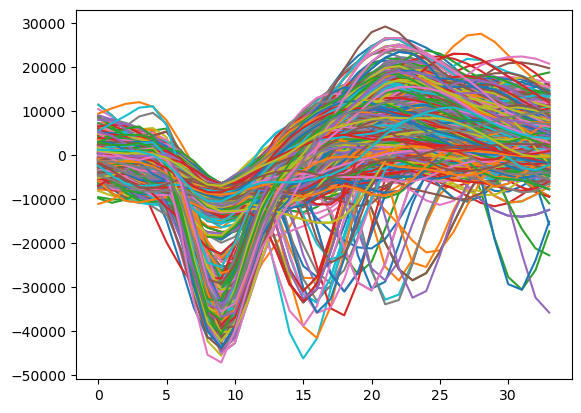

In [21]:
spike_data = df.to_numpy()
print(np.shape(spike_data))

# Create a random list of 50 signals out of the 3636 recordings and then plot these over time (column axis)
listRand = []
for i in range(2000):
  listRand.append(random.randint(0,np.shape(spike_data)[0]))

plt.plot( spike_data[listRand,:].T)

plt.show()

## Lets normalize the spike data this time before we proceed with the dimensionality reduction based on what we learned in class today

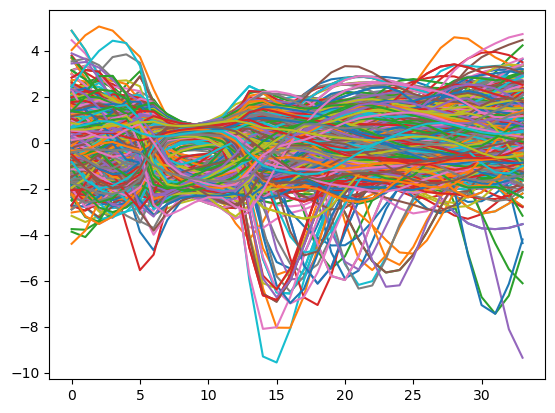

In [22]:
# normalize spike data
spike_data = spike_data - np.mean(spike_data, axis=0)
spike_data = spike_data / np.std(spike_data, axis=0)

plt.plot( spike_data[listRand,:].T)

plt.show()


In [23]:
#To initialize a PCA class instance
k = 5
pca_example = PCA(n_components=k) #Note: Use pca_example = PCA(n_components=m) to only compute for the largest m eigenmodes 

X = spike_data[listRand,:]

#To apply PCA to a data set
pca_example.fit(X)

#To return back it's projections onto the eigenvectors
projections = pca_example.transform(X)

# #To apply PCA to a data set and simultaneously return back it's projections onto the eigenvectors
# projections = pca_example.fit_transform(X)

#The (sorted from largest to smallest) eigenvalues are in the class variable:
example_pca_eigenvalues = pca_example.explained_variance_

#The fraction of the variance explained by each modes is given by:
example_pca_relative_variance = pca_example.explained_variance_ratio_

In [24]:
projections.shape

(2000, 5)

Text(0.5, 1.0, 'PCA')

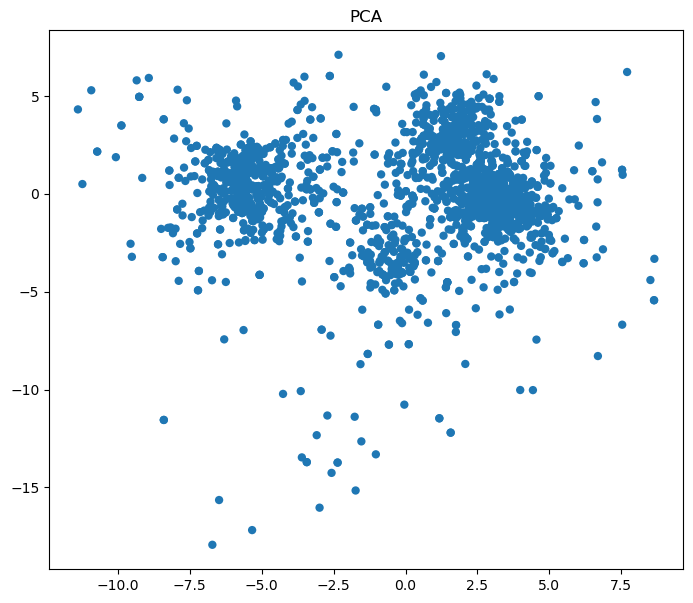

In [25]:
##PCA
fig = plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
plt.scatter(projections[:,0],projections[:,1],edgecolor="none") 
plt.title("PCA")


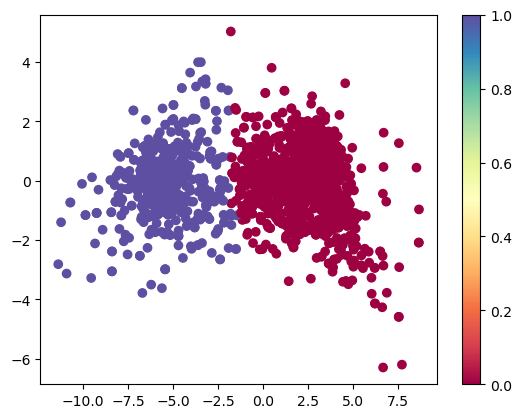

In [26]:
k = 2

km_example = KMeans(n_clusters=k)
km_example.fit(projections)
km_labels = km_example.predict(projections)

#To plot:
plt.scatter(projections[:,0],projections[:,4],c=km_labels,cmap='Spectral');plt.colorbar();plt.show()

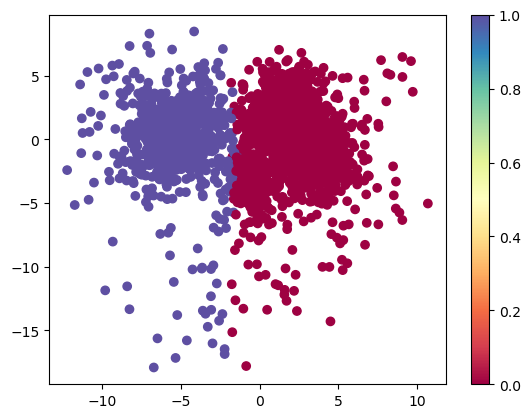

In [27]:
projections_ALLdata =  pca_example.transform(spike_data) 

km_labels = km_example.predict(projections_ALLdata)

#To plot:
plt.scatter(projections_ALLdata[:,0],projections_ALLdata[:,1],c=km_labels,cmap='Spectral');plt.colorbar();plt.show()

In [28]:
len(km_labels)

3636